In [1]:
# pip install matplotlib==3.3.4

In [2]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# CORA 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')

In [3]:
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

# 무방향 그래프 + degree

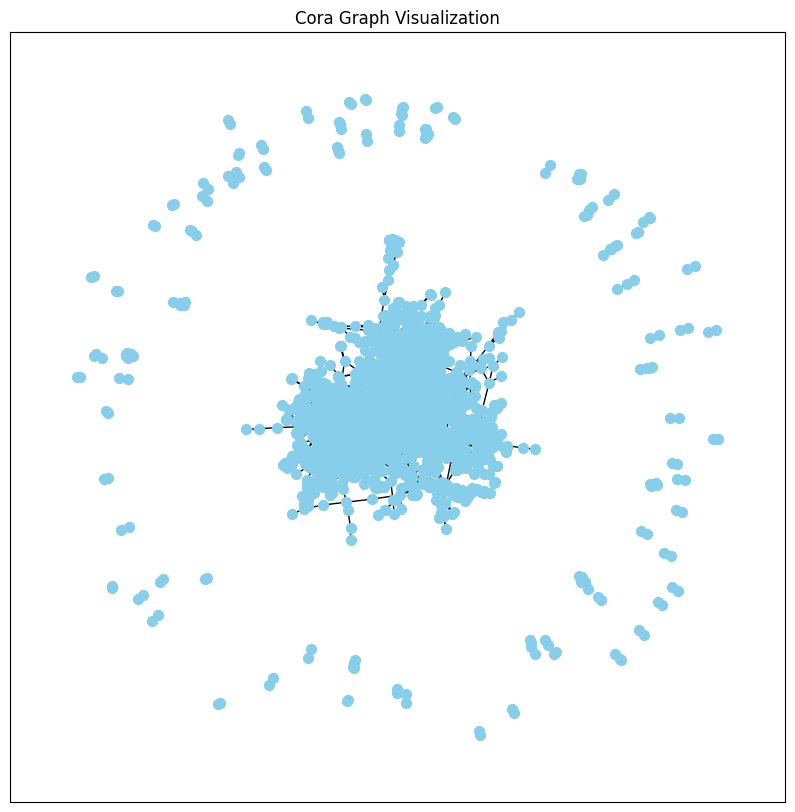

In [4]:
# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 그래프 그리기
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph_nx, seed=42)  # Spring layout 사용
nx.draw_networkx(graph_nx, pos, with_labels=False, node_size=50, node_color="skyblue")
plt.title("Cora Graph Visualization")
plt.show()

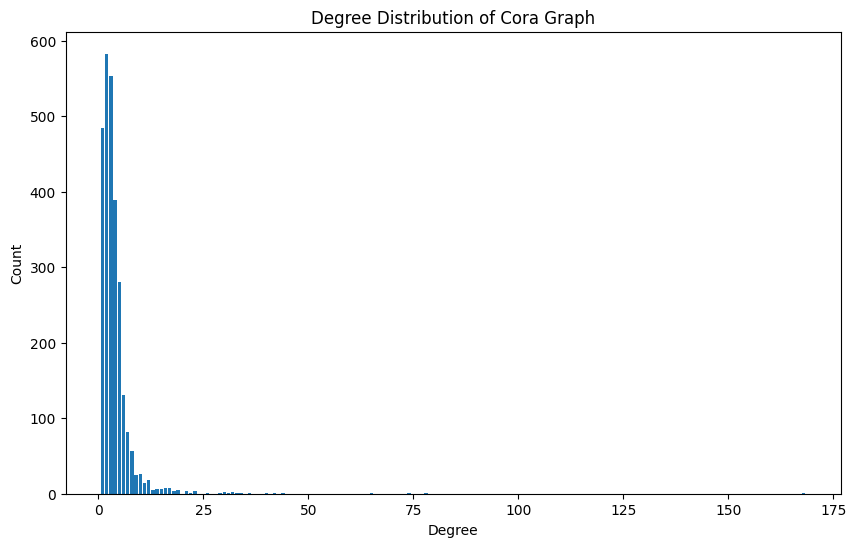

In [5]:
# node degree 계산
degrees = [degree for node, degree in nx.degree(graph_nx)]
degree_count = Counter(degrees)

# Degree 분포 출력
plt.figure(figsize=(10, 6))
plt.bar(degree_count.keys(), degree_count.values())
plt.title("Degree Distribution of Cora Graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

너무 크네요. 조금 더 자세히 들여다볼까요? 우린 이걸 서브그래프라고 해요.

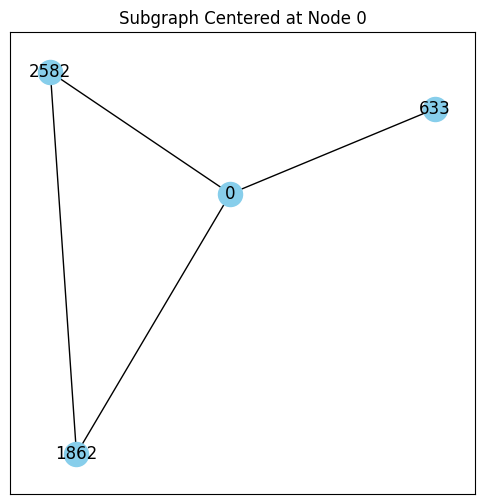

node degree(0) = 3


In [6]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import matplotlib.pyplot as plt

# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 특정 노드를 선택
selected_node = 0

# 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 subgraph를 추출
neighbors = list(graph_nx.neighbors(selected_node))
neighbors.append(selected_node)
subgraph_nx = graph_nx.subgraph(neighbors)

# 그래프 그리기
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw_networkx(subgraph_nx, pos, with_labels=True, node_color="skyblue")
plt.title("Subgraph Centered at Node {}".format(selected_node))
plt.show()

# node degree 출력
print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

##  Weight 추가

Cora 데이터셋은 무방향 그래프로, edge에 weight가 없습니다. 즉, 모든 edge의 weight는 동일하다고 볼 수 있습니다. 그럼에도 불구하고, edge에 weight를 추가하고, 이를 시각화하는 예시를 들어드리겠습니다. 노드 간의 연결 횟수를 weight로 사용하겠습니다.

Cora 데이터셋에서 특정 노드를 중심으로 하여, edge의 빈도를 weight로 설정하고 그래프를 시각화하는 코드를 작성해드리겠습니다.

여기서는 처음으로 나타나는 노드를 선택하였으며, 이 노드와 연결된 노드들만을 포함하는 subgraph를 생성하였습니다. 이후, edge의 빈도수를 계산하여 이를 edge의 weight로 사용하였습니다.

그런 다음, 이 weight를 그래프에 추가하고, weight에 따라 edge의 두께를 조절하여 그래프를 그리겠습니다.

#### 하지만! 
Cora 데이터셋은 무방향성 그래프로서, edge에 별도의 가중치가 존재하지 않습니다. 따라서 edge의 빈도수가 1로 동일하며, 이를 그래프에 시각화하려 하더라도 모든 edge의 빈도수가 1로 동일하므로, 모든 edge의 라벨이 1로 표시됩니다.

**그러니 이번에는**
numpy를 사용하여 edge 수만큼의 무작위 가중치를 생성하고, 이를 각 edge의 가중치로 설정합니다. 그 후에 이 가중치를 그래프에 표시하겠습니다.

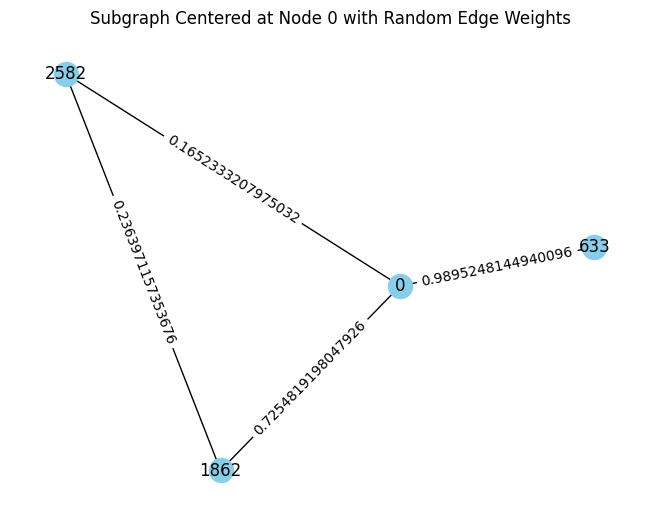

node degree(0) = 3


In [7]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 특정 노드를 선택
selected_node = 0

# 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 subgraph를 추출
neighbors = list(graph_nx.neighbors(selected_node))
neighbors.append(selected_node)
subgraph_nx = graph_nx.subgraph(neighbors)

# edge의 수만큼 무작위 가중치를 생성하고, 이를 각 edge의 가중치로 설정
weights = np.random.rand(subgraph_nx.number_of_edges())
for i, edge in enumerate(subgraph_nx.edges):
    subgraph_nx.edges[edge]['weight'] = weights[i]

# 그래프 그리기
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue")

# edge의 가중치를 그래프에 표시
edge_labels = nx.get_edge_attributes(subgraph_nx, 'weight')
nx.draw_networkx_edge_labels(subgraph_nx, pos, edge_labels=edge_labels)

plt.title("Subgraph Centered at Node {} with Random Edge Weights".format(selected_node))
plt.show()

# node degree 출력
print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

### Connected Graphs

노드 0, 1, 2를 중심으로 하는 서브그래프를 생성하고 각각의 연결성을 확인합니다.

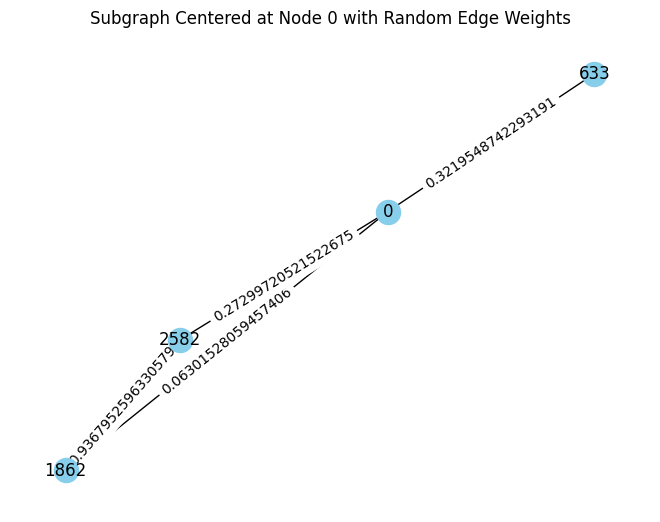

node degree(0) = 3
Is subgraph centered at node 0 connected? True


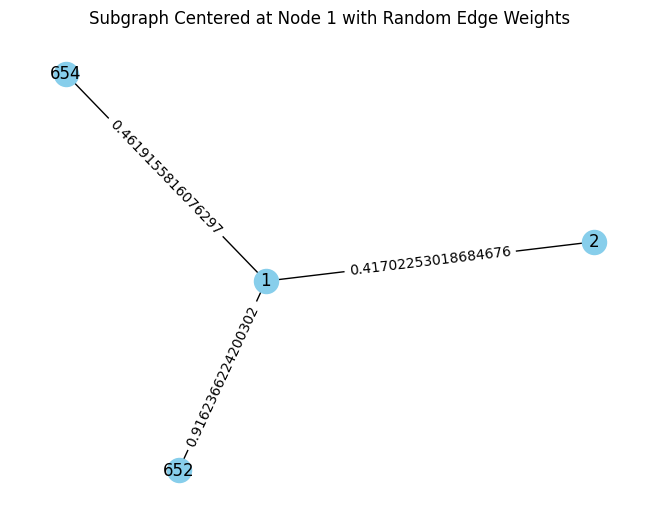

node degree(1) = 3
Is subgraph centered at node 1 connected? True


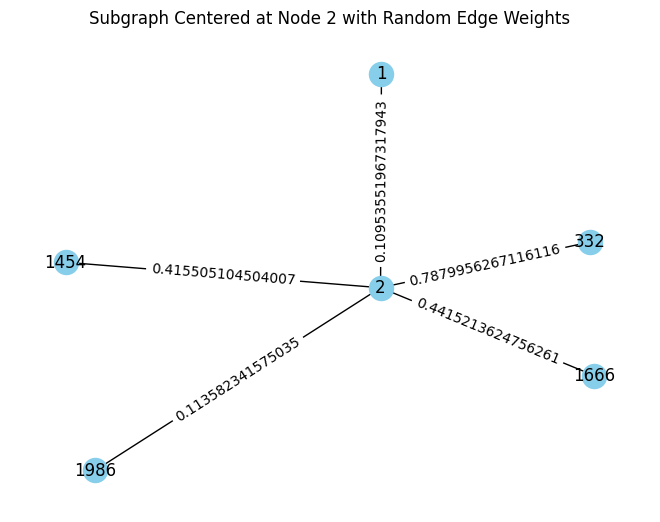

node degree(2) = 5
Is subgraph centered at node 2 connected? True


In [8]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 중심 노드를 선택 (여기서는 0, 1, 2를 선택)
center_nodes = [0, 1, 2]

for i, selected_node in enumerate(center_nodes):
    # 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 subgraph를 추출
    neighbors = list(graph_nx.neighbors(selected_node))
    neighbors.append(selected_node)
    subgraph_nx = graph_nx.subgraph(neighbors)

    # edge의 수만큼 무작위 가중치를 생성하고, 이를 각 edge의 가중치로 설정
    weights = np.random.rand(subgraph_nx.number_of_edges())
    for i, edge in enumerate(subgraph_nx.edges):
        subgraph_nx.edges[edge]['weight'] = weights[i]

    # 그래프 그리기
    plt.figure(i)
    pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
    nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue")

    # edge의 가중치를 그래프에 표시
    edge_labels = nx.get_edge_attributes(subgraph_nx, 'weight')
    nx.draw_networkx_edge_labels(subgraph_nx, pos, edge_labels=edge_labels)

    plt.title("Subgraph Centered at Node {} with Random Edge Weights".format(selected_node))
    plt.show()

    # node degree 출력
    print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

    # 서브그래프의 연결성 확인
    print(f"Is subgraph centered at node {selected_node} connected? {nx.is_connected(subgraph_nx)}")


위의 코드는 노드 0, 1, 2를 각각 중심으로 하는 서브그래프를 생성하고, 각 서브그래프에 무작위로 생성된 가중치를 설정한 후, 그래프를 그립니다. 그리고 각 서브그래프의 연결성을 확인하고 결과를 출력합니다. 또한, 각 중심 노드의 degree를 출력합니다.

## 이제 세 개를 하나의 서브플롯으로 플롯팅
해볼게요. 두 서브그래프 사이의 공통 엣지를 고려하여 그래프를 그리는 것 .

그러면 먼저 노드 1과 2, 그리고 각각에 직접 연결된 이웃 노드들을 포함한 하나의 큰 서브그래프를 만들고, 이를 한 개의 그래프로 그리는 것이 어떨까요?

node degree(0) = 3
node degree(1) = 3
node degree(2) = 5
Is subgraph connected? False


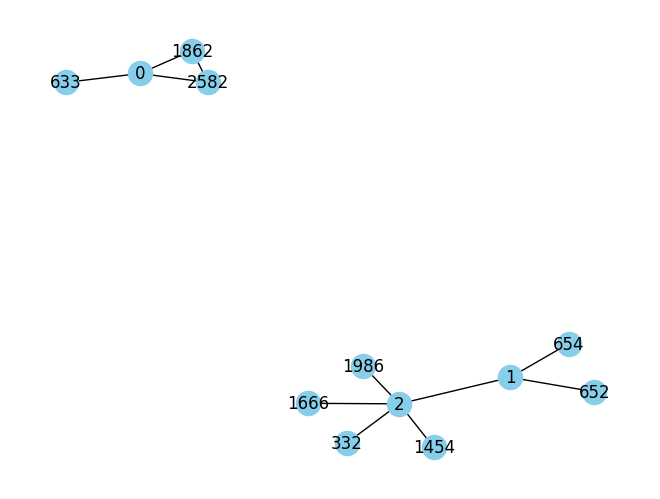

In [9]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 중심 노드를 선택 (여기서는 1, 2를 선택)
center_nodes = [0, 1, 2]

# 모든 이웃 노드를 저장할 리스트 초기화
all_neighbors = []

# 중심 노드들의 모든 이웃 노드를 all_neighbors에 추가
for selected_node in center_nodes:
    neighbors = list(graph_nx.neighbors(selected_node))
    all_neighbors += neighbors

# 중심 노드들도 all_neighbors에 추가
all_neighbors += center_nodes

# all_neighbors에 포함된 모든 노드들만으로 구성된 subgraph를 추출
subgraph_nx = graph_nx.subgraph(all_neighbors)

# 그래프 그리기
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue")

# node degree 출력
for selected_node in center_nodes:
    print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

# 그래프의 연결성 확인
print(f"Is subgraph connected? {nx.is_connected(subgraph_nx)}")

plt.show()


## 방향성
원래 Cora 데이터셋은 무방향성 그래프를 가지고 있습니다. 하지만 방향성을 강제로 추가하려면 edge 리스트를 무방향 그래프(nx.Graph())가 아닌 방향성 그래프(nx.DiGraph())로 변환하면 됩니다. 하지만 이는 엣지에 실제 방향성이 없음을 유의해야 합니다.

node degree(1) = 6
node degree(2) = 10
Is subgraph connected? True


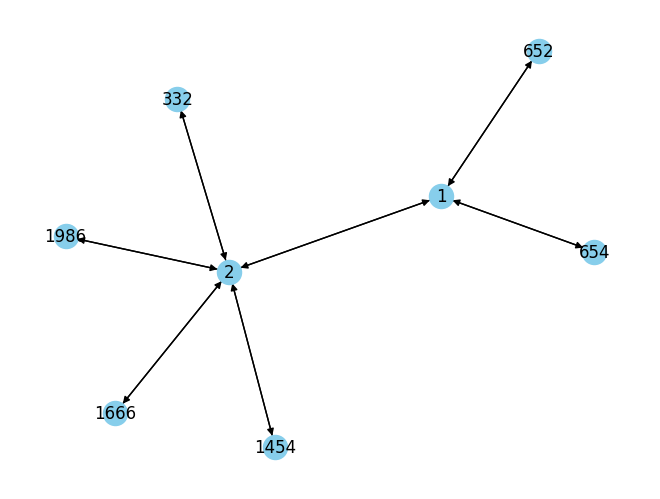

In [10]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.DiGraph())  # DiGraph를 사용하여 방향성 추가

# 중심 노드를 선택 (여기서는 1, 2를 선택)
center_nodes = [1, 2]

# 모든 이웃 노드를 저장할 리스트 초기화
all_neighbors = []

# 중심 노드들의 모든 이웃 노드를 all_neighbors에 추가
for selected_node in center_nodes:
    neighbors = list(graph_nx.neighbors(selected_node))
    all_neighbors += neighbors

# 중심 노드들도 all_neighbors에 추가
all_neighbors += center_nodes

# all_neighbors에 포함된 모든 노드들만으로 구성된 subgraph를 추출
subgraph_nx = graph_nx.subgraph(all_neighbors)

# 그래프 그리기
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue", 
        arrows=True)  # arrows 파라미터를 True로 설정하여 방향성 표시

# node degree 출력
for selected_node in center_nodes:
    print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

# 그래프의 연결성 확인
print(f"Is subgraph connected? {nx.is_strongly_connected(subgraph_nx)}")  # 방향성 그래프에 대한 연결성 확인

plt.show()


### Centrality 

Degree Centrality: 노드의 연결성을 측정합니다.
Betweenness Centrality: 노드가 네트워크의 다른 노드들 사이에서 얼마나 중요한 '다리' 역할을 하는지 측정합니다.
Eigenvector Centrality: 노드의 중요성이 그 이웃의 중요성에 의해 결정되는 경우를 측정합니다.
Closeness Centrality: 모든 다른 노드들과의 '가까움'을 측정합니다.

In [11]:
# Degree Centrality
degree_centrality = nx.degree_centrality(subgraph_nx)
print(f"Degree Centrality: {degree_centrality[2]}")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(subgraph_nx)
print(f"Betweenness Centrality: {betweenness_centrality[2]}")

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(subgraph_nx)
print(f"Eigenvector Centrality: {eigenvector_centrality[2]}")

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(subgraph_nx)
print(f"Closeness Centrality: {closeness_centrality[2]}")

Degree Centrality: 1.4285714285714284
Betweenness Centrality: 0.8571428571428571
Eigenvector Centrality: 0.6571909044161901
Closeness Centrality: 0.7777777777777778


### Density & Adjacency Matrix

네트워크의 밀도(Density)는 네트워크에서 가능한 모든 엣지의 수 대비 실제 엣지의 수를 나타냅니다. 이 값은 0과 1사이에 있으며, 1에 가까울수록 네트워크가 '밀집'되어 있다는 것을 의미합니다.     
NetworkX 라이브러리는 그래프의 Density와 Adjacency Matrix를 계산하는 기능을 제공합니다.

그래프의 Density는 그래프의 노드들이 얼마나 밀집해 있는지를 나타내는 측정값입니다. Density는 0 (모든 노드가 독립적일 경우)에서 1 (모든 노드가 서로 연결될 경우)까지의 값을 가집니다.
Adjacency Matrix는 그래프의 노드들이 서로 어떻게 연결되어 있는지를 나타내는 행렬입니다. 이 행렬의 크기는 (노드 수) x (노드 수)이며, 행렬의 (i, j) 원소는 i번째 노드와 j번째 노드가 서로 연결되어 있을 경우 1, 그렇지 않을 경우 0의 값을 가집니다.
다음은 서브그래프의 Density를 계산하고 Adjacency Matrix를 만드는 코드입니다:

In [12]:
# 그래프의 Density 계산
density = nx.density(subgraph_nx)
print(f"Density: {density}")

# Adjacency Matrix 만들기
adj_matrix = nx.adjacency_matrix(subgraph_nx)

# Adjacency Matrix 출력하기
print("Adjacency Matrix:")
print(adj_matrix.todense())  # .todense()를 사용하여 sparse matrix를 dense matrix로 변환


Density: 0.25
Adjacency Matrix:
[[0 1 0 0 1 0 1 0]
 [1 0 1 1 0 1 0 1]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


/tmp/ipykernel_8102/2899116222.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(subgraph_nx)


위의 코드는 nx.density() 함수를 사용하여 그래프의 Density를 계산하고, nx.adjacency_matrix() 함수를 사용하여 Adjacency Matrix를 계산합니다. nx.adjacency_matrix() 함수는 Scipy의 sparse matrix 형태로 행렬을 반환하므로, .todense() 메서드를 사용하여 이를 보통의 dense matrix로 변환하여 출력합니다.

이 결과를 통해, 서브그래프의 Density와 노드들이 어떻게 연결되어 있는지를 확인할 수 있습니다.

## random walk

In [33]:
def random_walk(start,length):
    walk = [str(start)] #starting node
    
    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors,1)[0]
        walk.append(str(next_node))
        start = next_node
    return walk

In [37]:
print(random_walk(0,206))

['0', '633', '1701', '1877', '1701', '699', '2327', '1778', '1367', '980', '589', '1624', '384', '1623', '660', '139', '103', '608', '1623', '1777', '426', '1777', '1624', '1785', '808', '638', '893', '2383', '1635', '1628', '1117', '2499', '1524', '1693', '1391', '1693', '2408', '1693', '1391', '1693', '965', '839', '965', '964', '965', '2197', '965', '839', '2277', '734', '95', '861', '1397', '861', '2068', '1377', '2068', '1330', '1204', '1602', '2072', '2182', '2180', '2182', '415', '1527', '2450', '562', '1483', '1620', '359', '389', '1077', '2450', '1284', '998', '1284', '1358', '1546', '2169', '2168', '2083', '650', '1250', '1173', '1250', '202', '1250', '650', '819', '1606', '764', '1612', '764', '1606', '819', '1606', '819', '154', '326', '1358', '757', '1358', '1169', '111', '2492', '111', '1762', '853', '1762', '853', '1762', '853', '1169', '2476', '2651', '105', '59', '1725', '59', '615', '2443', '1742', '2445', '1742', '1154', '1742', '580', '59', '580', '1742', '533', '24

## Deep walk

 DeepWalk 모델의 간략한 튜토리얼을 작성해 보겠습니다. 이 튜토리얼에서는 networkx를 사용해 그래프를 생성하고, gensim을 사용해 Word2Vec 모델을 학습시키며, 마지막으로 scikit-learn을 사용해 t-SNE로 임베딩을 시각화하고 Random Forest 모델로 분류 작업을 수행합니다.

In [14]:
# !pip install gensim-4.3.1 smart-open-6.3.0

In [ ]:
import random
import networkx as nx
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

CORA 데이터셋을 로드하고, networkx 그래프로 변환합니다. 데이터셋은 adjacency matrix와 node labels가 포함되어야 합니다. 여기서는 데이터를 로드하고 처리하는 방법이 명시되지 않았으므로, 이 부분은 간략하게 표현되어 있습니다.

In [38]:
# create a networkx graph from edge_index
edge_index = data.edge_index.numpy()
G = nx.from_edgelist(zip(edge_index[0], edge_index[1]))

# get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G)

node_labels = data.y.numpy()

/tmp/ipykernel_8102/959061245.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)


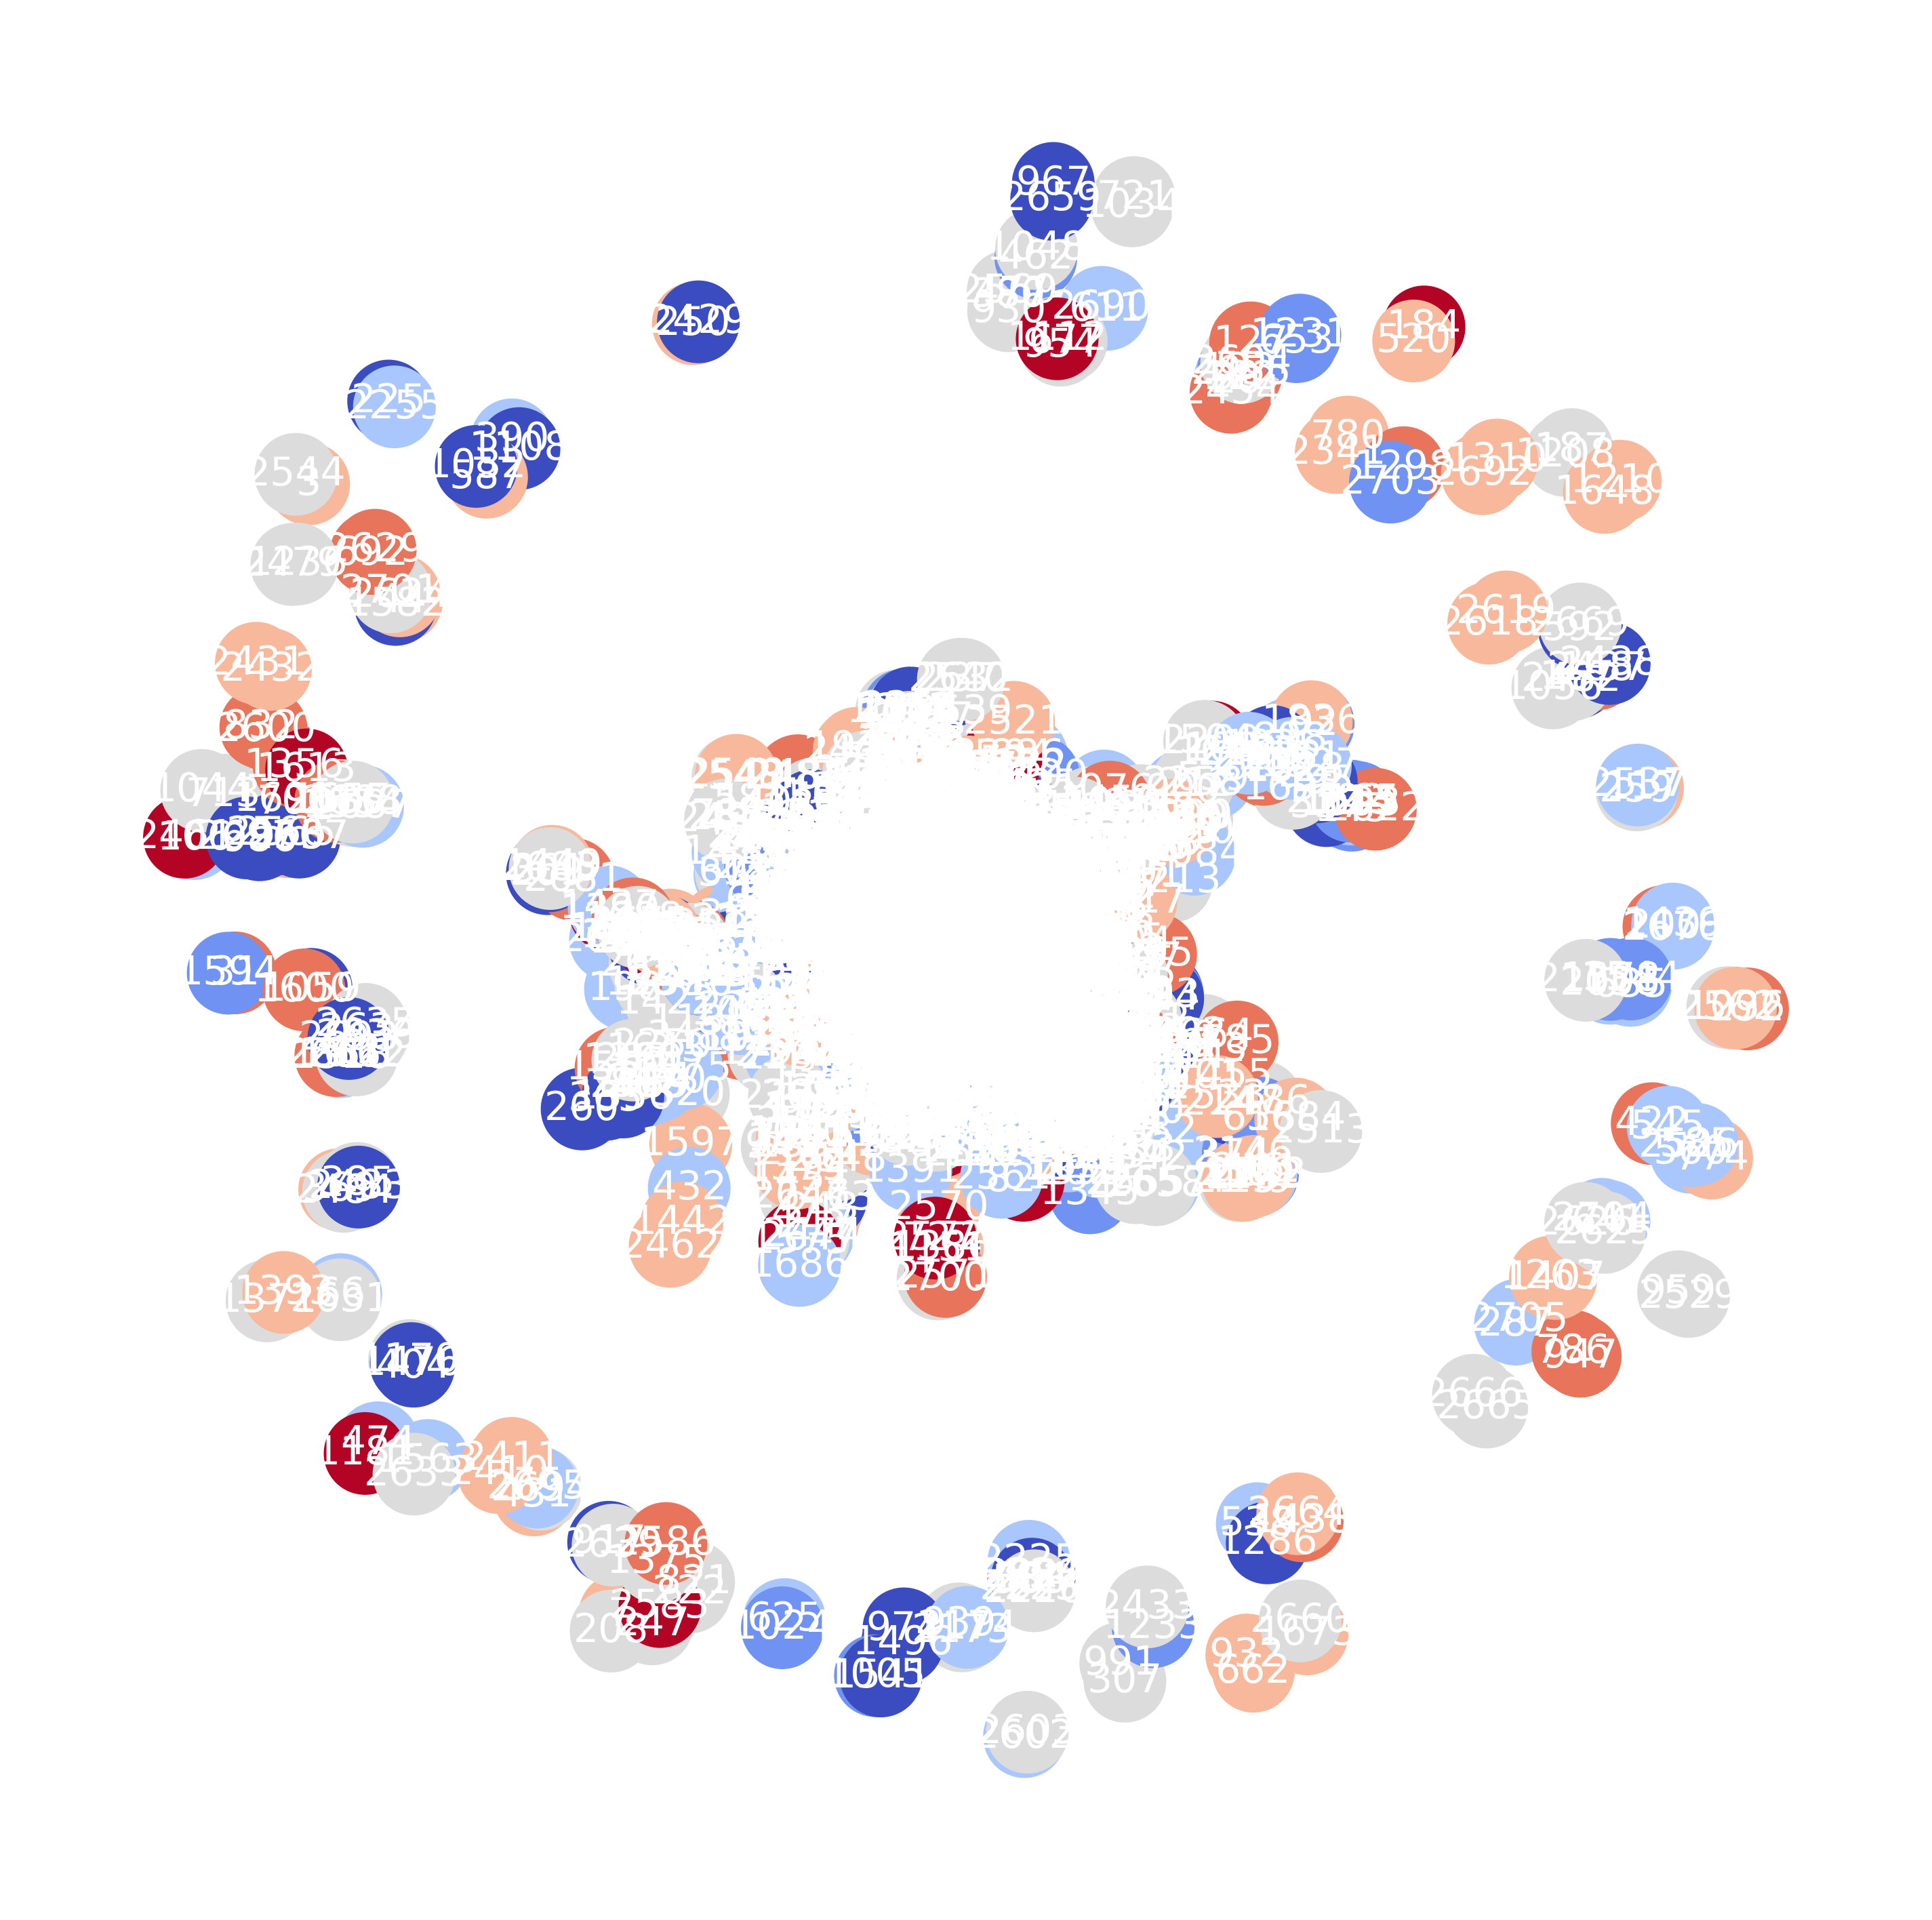

In [39]:
# label ploting

plt.figure(figsize= (12,12), dpi= 300)
plt.axis('off')
nx.draw_networkx(G,
               pos = nx.spring_layout(G, seed = 0),
               node_color = node_labels,
               node_size = 800,
               cmap = 'coolwarm',
               font_size = 14,
               font_color = 'white')

In [40]:
# 80 random walks of a length of 10 for every node in graph

walks = []
for node in G.nodes :
    for _ in range(80):
        walks.append(random_walk(node,10))

In [41]:
print(walks[0])

['0', '1862', '926', '1862', '2582', '0', '633', '0', '2582', '0', '1862']


In [ ]:
# 책 42p 반영 